In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
# Training data
np.random.seed(42)
num_samples = 1000
mean_1 = np.array([1.0, 1.0])
cov_1 = np.array([[1, 0], [0, 1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples // 2)
mean_2 = np.array([-1.0, -1.0])
cov_2 = np.array([[1, 0], [0, 1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples // 2)
data = np.vstack((data_1, data_2)) # 세로로 행렬 결합
labels = np.ones(num_samples)
labels[num_samples // 2:] = 0

print(len(data_1))
print(len(data_2))
print(len(data))

500
500
1000


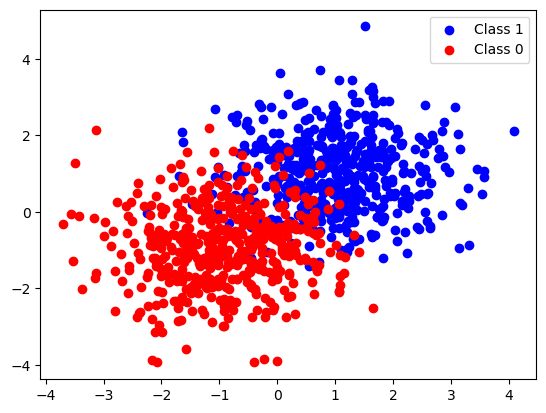

In [4]:
# Plot
plt.scatter(data_1[:, 0], data_1[:, 1], color='b', label='Class 1')
plt.scatter(data_2[:, 0], data_2[:, 1], color='r', label='Class 0')
plt.legend()
plt.show()


data.shape torch.Size([100, 2])
Epoch [0/1000], Loss: 1.0756
Epoch [100/1000], Loss: 0.6364
Epoch [200/1000], Loss: 0.4831
Epoch [300/1000], Loss: 0.4205
Epoch [400/1000], Loss: 0.3878
Epoch [500/1000], Loss: 0.3679
Epoch [600/1000], Loss: 0.3545
Epoch [700/1000], Loss: 0.3450
Epoch [800/1000], Loss: 0.3380
Epoch [900/1000], Loss: 0.3326
Epoch [1000/1000], Loss: 0.3284


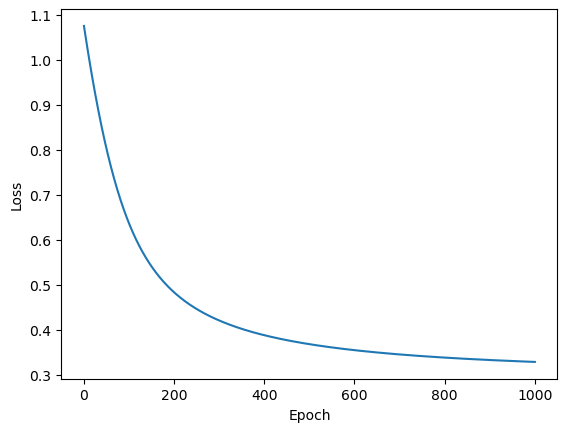

w [[0.12159963 1.5246972 ]]
b [-0.08442277]


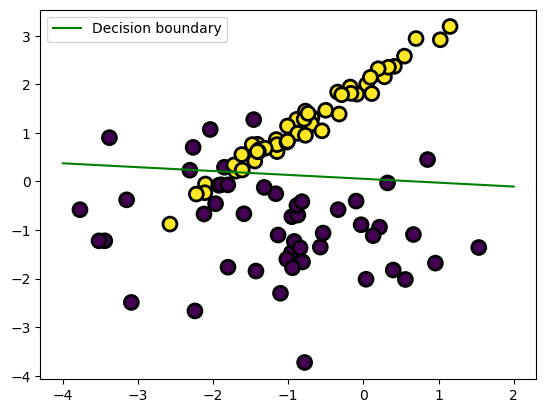

In [43]:
import torch
import torch.nn as nn

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# Convert data and labels to PyTorch Variables
data = torch.from_numpy(X).float()
labels = torch.from_numpy(y).float()
labels = labels.view(-1, 1) ## reshape와 같은 함수
num_samples, num_features = data.shape

# print("data_1.shape",data_1.shape)
# print("data_2.shape",data_2.shape)
print("data.shape",data.shape)

# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

# Initialize model, loss function, and optimizer
learning_rate = 0.01
num_epochs = 1000
input_dim = num_features
output_dim = 1
model = LogisticRegression(input_dim, output_dim)
criterion = nn.BCELoss() #Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train model
loss_history = []
for epoch in range(num_epochs+1):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.data.numpy())

    if epoch % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch, num_epochs, loss.data))

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot decision boundary
w = model.linear.weight.data.numpy()
print("w", w)
b = model.linear.bias.data.numpy()
print("b", b)
x_plot = np.array([-4, 2])
y_plot = (-b - w[0][0]*x_plot) / w[0][1]    #  0 = w1 x1 + w2 x2 + b
plt.plot(x_plot, y_plot, color='g', label='Decision boundary')
#plt.scatter(data_1[:, 0], data_1[:, 1], color='b', label='Class 1')
#plt.scatter(data_2[:, 0], data_2[:, 1], color='r', label='Class 0')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.legend()
plt.show()


In [44]:
model.eval()
x_test = torch.tensor([[1, 1]], dtype=torch.float32)
y_test = model(x_test)
print(f"예측 값: {y_test.squeeze().detach()}")

예측 값: 0.8266220688819885


In [40]:
if model(torch.Tensor([1,1]))>0.5:
    print("값: 1")
else:
    print("값: 0")


값: 1
